In [1]:
import pandas as pd
contribution = pd.read_csv('./autodl-tmp/Contributions_to_Candidates_and_Political_Committees.csv')

/tmp/ipykernel_826/2474914993.py:2: DtypeWarning: Columns (11,12,21,29) have mixed types. Specify dtype option on import or set low_memory=False.
  contribution = pd.read_csv('./autodl-tmp/Contributions_to_Candidates_and_Political_Committees.csv')


**Whether Executives**

In [2]:
contribution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 36 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1048575 non-null  int64  
 1   report_number               1048575 non-null  int64  
 2   origin                      1048575 non-null  object 
 3   committee_id                1048575 non-null  int64  
 4   filer_id                    1048575 non-null  object 
 5   type                        1048575 non-null  object 
 6   filer_name                  1048575 non-null  object 
 7   office                      1035470 non-null  object 
 8   legislative_district        305585 non-null   float64
 9   position                    139592 non-null   object 
 10  party                       933264 non-null   object 
 11  ballot_number               82 non-null       object 
 12  for_or_against              364 non-null      object 
 1

In [4]:
contribution1 = contribution.loc[contribution['contributor_occupation'].notna()]

In [6]:
contribution1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394247 entries, 1 to 1048574
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          394247 non-null  int64  
 1   report_number               394247 non-null  int64  
 2   origin                      394247 non-null  object 
 3   committee_id                394247 non-null  int64  
 4   filer_id                    394247 non-null  object 
 5   type                        394247 non-null  object 
 6   filer_name                  394247 non-null  object 
 7   office                      392041 non-null  object 
 8   legislative_district        88212 non-null   float64
 9   position                    42785 non-null   object 
 10  party                       364209 non-null  object 
 11  ballot_number               20 non-null      object 
 12  for_or_against              73 non-null      object 
 13  jurisdiction      

In [8]:
import re

# Step 3: Define a comprehensive list of executive keywords
executive_keywords = [
    'chief executive officer', 'ceo', 'chief operating officer', 'coo', 
    'chief financial officer', 'cfo', 'chief technology officer', 'cto', 
    'chief information officer', 'cio', 'chief marketing officer', 'cmo', 
    'chief compliance officer', 'cco', 'chief security officer', 'cso', 
    'chief human resources officer', 'chro', 'chief data officer', 'cdo', 
    'chief strategy officer', 'chief product officer', 'chief science officer', 
    'chief creative officer', 'chief legal officer', 'clo', 'president', 
    'vice president', 'managing director', 'executive director', 'senior director', 
    'group director', 'executive vice president', 'senior vice president', 
    'regional director', 'regional vice president', 'partner', 'founder', 'co-founder',
    'head of', 'global head', 'national director', 'area director', 'sector lead', 
    'practice lead', 'division lead', 'executive manager', 'executive officer', 
    'executive chair', 'executive coordinator', 'lead executive', 'board member', 
    'board executive', 'board director', 'executive board member', 'executive trustee', 
    'chief of staff', 'general manager', 'chief executive', 'corporate vice president', 
    'executive partner', 'business executive', 'corporate director', 'corporate officer', 
    'executive consultant', 'executive advisor', 'chief advisor', 'chief auditor', 
    'chief risk officer', 'chief investment officer'
]

# Create a regular expression from the keywords
regex_pattern = '|'.join([f'\\b{re.escape(keyword)}\\b' for keyword in executive_keywords])

# Step 4: Function to identify executive titles
def is_executive(title):
    # Convert title to lowercase to ensure case-insensitive matching
    title = title.lower()
    if re.search(regex_pattern, title):
        return 'Executive'
    else:
        return 'Non-Executive'

# Step 5: Apply the function to the 'Job Title' column
contribution1['Executive Status'] = contribution1['contributor_occupation'].apply(is_executive)

# View the modified DataFrame
print(contribution1.head())


         id  report_number origin  committee_id    filer_id  \
1  17210321      110143608     C3         21121  WHATRP 227   
4  17210318      110143608     C3         21121  WHATRP 227   
6  16417211      110108190     C3         30904  BHAGH  570   
7  16417210      110108190     C3         30904  BHAGH  570   
8  16417209      110108190     C3         30904  BHAGH  570   

                  type                       filer_name               office  \
1  Political Committee  WHATCOM COUNTY REPUBLICAN PARTY                  NaN   
4  Political Committee  WHATCOM COUNTY REPUBLICAN PARTY                  NaN   
6            Candidate              Harry O. Bhagwandin  COUNTY COMMISSIONER   
7            Candidate              Harry O. Bhagwandin  COUNTY COMMISSIONER   
8            Candidate              Harry O. Bhagwandin  COUNTY COMMISSIONER   

   legislative_district                        position  ... contributor_city  \
1                   NaN                             NaN  ..

/tmp/ipykernel_1949/4033888531.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contribution1['Executive Status'] = contribution1['contributor_occupation'].apply(is_executive)


In [11]:
contribution2 = contribution1.loc[contribution1['Executive Status'] == 'Executive']

In [12]:
len(list(set(contribution2['contributor_name'].to_list())))

10455

In [13]:
contribution2.to_csv('Executive_contribution.csv')

**Company Matching**

In [17]:
from name_matching.name_matcher import NameMatcher

# initialise the name matcher
matcher = NameMatcher(number_of_matches=1, 
                      legal_suffixes=True, 
                      common_words=False, 
                      top_n=1, 
                      verbose=True)
# adjust the distance metrics to use
matcher.set_distance_metrics(['bag', 'typo', 'refined_soundex'])

In [29]:
df_companies_a = df1.loc[df1['companyname'].notna()]

In [30]:
df_companies_a = df1.loc[df1['companyname'].notna()]
df_companies_a['companyname'] = df_companies_a['companyname'].apply(lambda x: x.replace('\t', '').replace('\n', '').strip())

/tmp/ipykernel_1949/2757381354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_companies_a['companyname'] = df_companies_a['companyname'].apply(lambda x: x.replace('\t', '').replace('\n', '').strip())


In [20]:
df_companies_b = pd.DataFrame({'Company name': list(set(contribution['contributor_employer_name'].to_list())) })
df_companies_b = df_companies_b.dropna()
df_companies_b['Company name'] = df_companies_b['Company name'].apply(lambda x: x.replace('\t', '').replace('\n', '').strip())

In [41]:
matcher.load_and_process_master_data(column='companyname',
                                     df_matching_data=df_companies_a, 
                                     transform=True)

matches = matcher.match_names(to_be_matched=df_companies_b, 
                              column_matching='Company name')

preprocessing...

preprocessing complete 
 searching for matches...



100%|██████████| 14/14 [00:28<00:00,  2.01s/it]


possible matches found   
 fuzzy matching...



100%|██████████| 65809/65809 [06:37<00:00, 165.46it/s]

done


In [44]:
len(matches)

65809

In [45]:
len(df1)

44518

In [32]:
matches.loc[matches['score']>=90]

,original_name,match_name,score,match_index
605,wen technology,wm technology inc,91.666667,39213
754,pacific gas and electric,pacific gas and electric company,100.000000,26526
1221,microsoft corp,microsoft corporation,100.000000,43883
1335,exxonmobil,exxon mobil corporation,93.939394,38589
1786,vacasa,vacasa inc,100.000000,35171
...,...,...,...,...
64630,stitch fix,stitch fix inc,100.000000,24411
64684,wels fargo,wells fargo company,93.939394,23416
64851,mocrosoft,microsoft corporation,94.444444,43883
65221,delta airlines inc,delta air lines inc,95.555556,44209


In [51]:

combined = pd.merge(df_companies_a, matches, how='left', left_index=True, right_on='match_index')
combined = pd.merge(combined, df_companies_b, how='left', left_index=True, right_index=True)


In [52]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86806 entries, 1.0 to nan
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      86806 non-null  int64  
 1   direction                       86806 non-null  float64
 2   contribution                    86806 non-null  float64
 3   name                            86806 non-null  object 
 4   tname                           86806 non-null  object 
 5   index                           86806 non-null  int64  
 6   companyid                       86806 non-null  float64
 7   keydevid                        86806 non-null  float64
 8   transcriptid                    86806 non-null  float64
 9   headline                        86806 non-null  object 
 10  mostimportantdateutc            86806 non-null  object 
 11  mostimportanttimeutc            86806 non-null  object 
 12  keydeveventtypeid               86806

In [56]:
print(combined.loc[combined['score']>90][['companyname','original_name','match_name','score','Company name']])

                              companyname             original_name  \
605.0                   wm technology inc            wen technology   
754.0    pacific gas and electric company  pacific gas and electric   
1221.0              microsoft corporation            microsoft corp   
1335.0            exxon mobil corporation                exxonmobil   
1786.0                         vacasa inc                    vacasa   
...                                   ...                       ...   
64630.0                    stitch fix inc                stitch fix   
64684.0               wells fargo company                wels fargo   
64851.0             microsoft corporation                 mocrosoft   
65221.0               delta air lines inc        delta airlines inc   
65654.0               wells fargo company               wells fargo   

                               match_name       score  \
605.0                   wm technology inc   91.666667   
754.0    pacific gas and electric

In [55]:
len(list(set(combined.loc[combined['score']>90]['companyname'].to_list())))

97

**Name Matching**

In [74]:
import pandas as pd
df = pd.read_csv('./autodl-tmp/2019.csv')

In [75]:
df1 = df
import numpy as np
df1 = df1.loc[df['max_similarity_score'] > np.mean(df['max_similarity_score'].to_list())]

In [76]:
df1 = df1.loc[df1['speakertypename'] == 'Executives']

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508114 entries, 0 to 1104783
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0.1                    508114 non-null  int64  
 1   Unnamed: 0                      508114 non-null  int64  
 2   companyid                       508114 non-null  float64
 3   keydevid                        508114 non-null  float64
 4   transcriptid                    508114 non-null  float64
 5   headline                        508114 non-null  object 
 6   mostimportantdateutc            508114 non-null  object 
 7   mostimportanttimeutc            508114 non-null  float64
 8   keydeveventtypeid               508114 non-null  float64
 9   keydeveventtypename             508114 non-null  object 
 10  companyname                     0 non-null       float64
 11  transcriptcollectiontypeid      508114 non-null  float64
 12  transcriptcollection

In [7]:
contribution = pd.read_csv('./autodl-tmp/Contributions_to_Candidates_and_Political_Committees.csv')

/tmp/ipykernel_826/1856821083.py:1: DtypeWarning: Columns (11,12,21,29) have mixed types. Specify dtype option on import or set low_memory=False.
  contribution = pd.read_csv('./autodl-tmp/Contributions_to_Candidates_and_Political_Committees.csv')


In [8]:
contribution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 36 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1048575 non-null  int64  
 1   report_number               1048575 non-null  int64  
 2   origin                      1048575 non-null  object 
 3   committee_id                1048575 non-null  int64  
 4   filer_id                    1048575 non-null  object 
 5   type                        1048575 non-null  object 
 6   filer_name                  1048575 non-null  object 
 7   office                      1035470 non-null  object 
 8   legislative_district        305585 non-null   float64
 9   position                    139592 non-null   object 
 10  party                       933264 non-null   object 
 11  ballot_number               82 non-null       object 
 12  for_or_against              364 non-null      object 
 1

In [9]:
from name_matching.name_matcher import NameMatcher

# initialise the name matcher
matcher = NameMatcher(number_of_matches=1, 
                      legal_suffixes=True, 
                      common_words=False, 
                      top_n=1, 
                      verbose=True)
# adjust the distance metrics to use
matcher.set_distance_metrics(['bag', 'typo', 'refined_soundex'])

In [78]:
df_names_a = pd.DataFrame({'transcriptpersonname': list(set(df1['transcriptpersonname'].to_list())) })
df_names_a = df_names_a.dropna()
df_names_a['transcriptpersonname'] = df_names_a['transcriptpersonname'].apply(lambda x: x.replace('\t', '').replace('\n', '').strip())

In [37]:
df_names_b = pd.DataFrame({'contributor_name': list(set(contribution['contributor_name'].to_list())) })
df_names_b = df_names_b.dropna()
df_names_b['contributor_name'] = df_names_b['contributor_name'].apply(lambda x: x.replace('\t', '').replace('\n', '').strip())

In [79]:
matcher.load_and_process_master_data(column='transcriptpersonname',
                                     df_matching_data=df_names_a, 
                                     transform=True)

matches = matcher.match_names(to_be_matched=df_names_b, 
                              column_matching='contributor_name')

preprocessing...

preprocessing complete 
 searching for matches...



100%|██████████| 77/77 [03:39<00:00,  2.85s/it]


possible matches found   
 fuzzy matching...



100%|██████████| 382711/382711 [27:19<00:00, 233.46it/s]

done


In [ ]:
combined = pd.merge(df_names_a, matches, how='left', left_index=True, right_on='match_index')
combined = pd.merge(combined, df_names_b, how='left', left_index=True, right_index=True)

In [84]:
combined1 = combined.dropna(axis=0)

In [85]:
combined1 = combined.loc[combined['score'] >= 85]

In [86]:
combined1.to_csv('2019_matched_name.csv')

In [94]:
combined1=pd.read_csv('2020_matched_name.csv')

In [87]:
combined1

,transcriptpersonname,original_name,match_name,score,match_index,contributor_name
402.0,martin kelly,martin kelly j,martin kelly,85.714286,27592,martin kelly j
623.0,graham drake,graham dirk,graham drake,86.111111,4846,graham dirk
1038.0,howard marks,howard mark,howard marks,94.444444,20879,howard mark
1178.0,thomas james,thomas james m,thomas james,85.714286,26400,thomas james m
2163.0,stanton jones,stanton james,stanton jones,88.461538,4207,stanton james
...,...,...,...,...,...,...
378145.0,andrew bruce,andrews bruce,andrew bruce,90.705128,26726,andrews bruce
379175.0,gregory glenn,gregor glenn,gregory glenn,94.871795,96,gregor glenn
379964.0,robert richard,raport richard,robert richard,85.714286,8382,raport richard
381980.0,richard carlson,richard carlson,richard carlson,100.000000,24512,richard carlson


In [25]:
matcher.load_and_process_master_data(column='contributor_name',
                                     df_matching_data=contribution, 
                                     transform=True)

In [95]:
contribution.loc[contribution['contributor_name'].isin(combined1['contributor_name'].to_list())]

,id,report_number,origin,committee_id,filer_id,type,filer_name,office,legislative_district,position,...,contributor_address,contributor_city,contributor_state,contributor_zip,contributor_occupation,contributor_employer_name,contributor_employer_city,contributor_employer_state,url,contributor_location
210,16417624,110108231,C3,27342,REYNR--666,Candidate,Rey Reynolds,COUNTY SHERIFF,NaN,NaN,...,903 SE 6th St,Battle Ground,WA,98604,NaN,NaN,NaN,NaN,https://apollo.pdc.wa.gov/public/registrations...,NaN
485,16418146,110108278,C3,27196,MACED 592,Candidate,Drew C. MacEwen,STATE SENATOR,35.0,NaN,...,5184 Granada Pl SE,Port Orchard,WA,98367,NaN,NaN,NaN,NaN,https://apollo.pdc.wa.gov/public/registrations...,NaN
552,3479743,100880263,C3,18257,SMITN 236,Candidate,Norma C. Smith (NORMA SMITH),STATE REPRESENTATIVE,10.0,State Representative Pos. 1,...,2350 SOUNDVIEW DR,LANGLEY,WA,98260,NaN,NaN,NaN,NaN,https://web.pdc.wa.gov/rptimg/default.aspx?rep...,NaN
679,10579948,100411946,C3,20737,WASHOP 057,Political Committee,WASHINGTON OPTOMETRIC PHYSICIANS POLITICAL ACT...,NaN,NaN,NaN,...,4403 W COURT J,PASCO,WA,99301,NaN,NaN,NaN,NaN,https://web.pdc.wa.gov/rptimg/default.aspx?rep...,NaN
710,17212593,110143781,C3,31735,MORAT 102,Candidate,Tammy J. Morales (Tammy Morales),CITY COUNCIL MEMBER,NaN,"CITY COUNCIL MEMBER, POSITION 2",...,6216 46th Ave S,Seattle,WA,98118,NaN,NaN,NaN,NaN,https://apollo.pdc.wa.gov/public/registrations...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047185,1677688,100939830,C3,5465,DUNNM 203,Candidate,Megan Dunn (MEGAN DUNN),COUNTY COUNCIL MEMBER,NaN,NaN,...,2822 LARLIN DRIVE,EVERETT,WA,98213,NaN,NaN,NaN,NaN,https://web.pdc.wa.gov/rptimg/default.aspx?rep...,NaN
1047279,1677730,100948532,C3,5465,DUNNM 203,Candidate,Megan Dunn (MEGAN DUNN),COUNTY COUNCIL MEMBER,NaN,NaN,...,812 HOYT AVENUE,EVERETT,WA,98201,CONSULTANT,PAUL ROBERTS & ASSOCIATES LLC,EVERETT,WA,https://web.pdc.wa.gov/rptimg/default.aspx?rep...,POINT (-122.20966 48.00648)
1047503,14066672,100233659,C3,19286,TARLG 109,Candidate,Gael D Tarleton,PORT COMMISSIONER,NaN,NaN,...,2908 131ST PLACE NE,BELLEVUE,WA,98005,RETIRED,NOT EMPLOYED,SEATTLE,WA,https://web.pdc.wa.gov/rptimg/default.aspx?rep...,NaN
1047648,11824434,100242687,C3,5466,DUNNR 059,Candidate,Reagan B. Dunn,COUNTY COUNCIL MEMBER,NaN,NaN,...,PO BOX 1377,BELLEVUE,WA,98009,NaN,NaN,NaN,NaN,https://web.pdc.wa.gov/rptimg/default.aspx?rep...,NaN


In [92]:
matched_contribution2019 = contribution.loc[contribution['contributor_name'].isin(combined1['contributor_name'].to_list())]
print(len(matched_contribution2019))
matched_contribution2019.to_csv('matched_contribution2019.csv')

2108


In [90]:
matcher.load_and_process_master_data(column='transcriptpersonname',
                                     df_matching_data=df1, 
                                     transform=True)

In [91]:
df1.loc[df1['transcriptpersonname'].isin(combined1['transcriptpersonname'].to_list())]

,Unnamed: 0.1,Unnamed: 0,companyid,keydevid,transcriptid,headline,mostimportantdateutc,mostimportanttimeutc,keydeveventtypeid,keydeveventtypename,...,companyofperson,speakertypeid,speakertypename,componenttextpreview,word_count,componenttext,preprocessed_componenttext,assigned_theme,max_similarity,max_similarity_score
757,757,757,314148703.0,597034685.0,1630856.0,"Codiak Biosciences, Inc., Jazz Pharmaceuticals...",2019-01-04,48600.0,194.0,Special Calls,...,NaN,2.0,Executives,"Thank you, Bruce, and thanks to the entire tea...",1319.0,"Thank you, Bruce, and thanks to the entire tea...",thank bruce thanks entire team jazz good morni...,industry,0.523509,0.650752
758,758,758,314148703.0,597034685.0,1630856.0,"Codiak Biosciences, Inc., Jazz Pharmaceuticals...",2019-01-04,48600.0,194.0,Special Calls,...,NaN,2.0,Executives,"Sure, be happy to. So I think you're correct, ...",215.0,"Sure, be happy to. So I think you're correct, ...",sure happy think 're correct number companies ...,industry,0.523509,0.607082
759,759,759,314148703.0,597034685.0,1630856.0,"Codiak Biosciences, Inc., Jazz Pharmaceuticals...",2019-01-04,48600.0,194.0,Special Calls,...,NaN,2.0,Executives,I think we feel very comfortable based on the ...,163.0,I think we feel very comfortable based on the ...,think feel comfortable based preclinical data ...,health,0.523509,0.642475
764,764,764,6724933.0,597034685.0,1630856.0,"Codiak Biosciences, Inc., Jazz Pharmaceuticals...",2019-01-04,48600.0,194.0,Special Calls,...,NaN,2.0,Executives,"Yes, it's a growing list. We certainly have sp...",217.0,"Yes, it's a growing list. We certainly have sp...",yes 's growing list certainly spent lot time l...,industry,0.523509,0.616113
766,766,766,314148703.0,597034685.0,1630856.0,"Codiak Biosciences, Inc., Jazz Pharmaceuticals...",2019-01-04,48600.0,194.0,Special Calls,...,NaN,2.0,Executives,So I'll take the second question first. I thin...,315.0,So I'll take the second question first. I thin...,'ll take second question first think 's one vi...,health,0.523509,0.615650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103816,1103816,1103816,12719228.0,628311017.0,2093616.0,"Artis Real Estate Investment Trust, Q2 2019 Ea...",2019-08-01,77400.0,48.0,Earnings Calls,...,NaN,2.0,Executives,"Thanks, Armin, and good afternoon, everyone. I...",1552.0,"Thanks, Armin, and good afternoon, everyone. I...",thanks armin good afternoon everyone 'll keep ...,finance,0.523509,0.611529
1104006,1104006,1104006,398351.0,645761463.0,2096405.0,"MKS Instruments, Inc. Presents at Nasdaq 41st ...",2019-12-03,36900.0,51.0,Company Conference Presentations,...,NaN,2.0,Executives,"Thank you, and good morning, everybody. So I'l...",1795.0,"Thank you, and good morning, everybody. So I'l...",thank good morning everybody 'll talk little b...,industry,0.523509,0.687499
1104007,1104007,1104007,398351.0,645761463.0,2096405.0,"MKS Instruments, Inc. Presents at Nasdaq 41st ...",2019-12-03,36900.0,51.0,Company Conference Presentations,...,NaN,2.0,Executives,Yes. In terms of cyclical risk. So we've been ...,462.0,Yes. In terms of cyclical risk. So we've been ...,yes terms cyclical risk 've semi long time 's ...,industry,0.523509,0.624453
1104119,1104119,1104119,12719228.0,639834097.0,2101370.0,"Artis Real Estate Investment Trust, Q3 2019 Ea...",2019-11-04,79200.0,48.0,Earnings Calls,...,NaN,2.0,Executives,"Thanks, Armin, and good afternoon, everyone.So...",1576.0,"Thanks, Armin, and good afternoon, everyone.\r...",thanks armin good afternoon everyone little re...,finance,0.523509,0.622182


In [93]:
matched_transcript2019 = df1.loc[df1['transcriptpersonname'].isin(combined1['transcriptpersonname'].to_list())]
print(len(matched_transcript2019))
matched_transcript2019.to_csv('matched_transcript2019.csv')
#改4个

9584


In [98]:
all_macthed_transcript = pd.concat([matched_transcript2019, matched_transcript2020, matched_transcript2021, matched_transcript2022, matched_transcript2023], ignore_index=True)

In [99]:
all_macthed_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51565 entries, 0 to 51564
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0.1                    35033 non-null  float64
 1   Unnamed: 0                      51565 non-null  int64  
 2   companyid                       51565 non-null  float64
 3   keydevid                        51565 non-null  float64
 4   transcriptid                    51565 non-null  float64
 5   headline                        51565 non-null  object 
 6   mostimportantdateutc            51565 non-null  object 
 7   mostimportanttimeutc            51565 non-null  object 
 8   keydeveventtypeid               51565 non-null  float64
 9   keydeveventtypename             51565 non-null  object 
 10  companyname                     25449 non-null  object 
 11  transcriptcollectiontypeid      51565 non-null  float64
 12  transcriptcollectiontypename    

In [101]:
len(list(set(all_macthed_transcript['transcriptpersonname'].to_list())))

1371

In [102]:
Executive_contribution = pd.read_csv('Executive_contribution.csv')

/tmp/ipykernel_826/1851333296.py:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  Executive_contribution = pd.read_csv('Executive_contribution.csv')


In [103]:
Executive_contribution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21410 entries, 0 to 21409
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  21410 non-null  int64  
 1   id                          21410 non-null  int64  
 2   report_number               21410 non-null  int64  
 3   origin                      21410 non-null  object 
 4   committee_id                21410 non-null  int64  
 5   filer_id                    21410 non-null  object 
 6   type                        21410 non-null  object 
 7   filer_name                  21410 non-null  object 
 8   office                      21393 non-null  object 
 9   legislative_district        5044 non-null   float64
 10  position                    1849 non-null   object 
 11  party                       19971 non-null  object 
 12  ballot_number               1 non-null      object 
 13  for_or_against              3 n

In [104]:
matcher.load_and_process_master_data(column='contributor_name',
                                     df_matching_data=Executive_contribution, 
                                     transform=True)

In [106]:
executive_list = list(set(Executive_contribution['contributor_name'].to_list()))

In [108]:
all_matched_transcript1 = all_macthed_transcript

In [109]:
def check_executive(name, executive_list):
    return 1 if name in executive_list else 0

# Apply this function to create the new column
all_matched_transcript1['whether_executive'] = all_matched_transcript1['transcriptpersonname'].apply(check_executive, args=(executive_list,))

# Display the DataFrame to see the result
print(all_matched_transcript1)

       Unnamed: 0.1  Unnamed: 0    companyid      keydevid  transcriptid  \
0             757.0         757  314148703.0  5.970347e+08     1630856.0   
1             758.0         758  314148703.0  5.970347e+08     1630856.0   
2             759.0         759  314148703.0  5.970347e+08     1630856.0   
3             764.0         764    6724933.0  5.970347e+08     1630856.0   
4             766.0         766  314148703.0  5.970347e+08     1630856.0   
...             ...         ...          ...           ...           ...   
51560      815285.0      815285    9447242.0  1.847533e+09     2921870.0   
51561      815289.0      815289    9447242.0  1.847533e+09     2921870.0   
51562      815334.0      815334     882775.0  1.848178e+09     2922449.0   
51563      815341.0      815341     882775.0  1.848178e+09     2922449.0   
51564      815975.0      815975     395228.0  1.848934e+09     2922985.0   

                                                headline mostimportantdateutc  \
0     

In [110]:
all_matched_transcript1.groupby('whether_executive').count()

,Unnamed: 0.1,Unnamed: 0,companyid,keydevid,transcriptid,headline,mostimportantdateutc,mostimportanttimeutc,keydeveventtypeid,keydeveventtypename,...,speakertypename,componenttextpreview,word_count,componenttext,preprocessed_componenttext,assigned_theme,max_similarity,max_similarity_score,transcriptcomponentid,pro_id
whether_executive,,,,,,,,,,,,,,,,,,,,,
0,34819,51153,51153,51153,51153,51153,51153,51153,51153,51153,...,51153,51153,51153,51153,51153,51153,9521,51153,25298,24132
1,214,412,412,412,412,412,412,412,412,412,...,412,412,412,412,412,412,63,412,151,149


In [111]:
df_companies_a = pd.DataFrame({'Company name': list(set(all_matched_transcript1['companyname'].to_list()))})
df_companies_a = df_companies_a.dropna()
df_companies_a['Company name'] = df_companies_a['Company name'].apply(lambda x: x.replace('\t', '').replace('\n', '').strip())

In [112]:
df_companies_b = pd.DataFrame({'Company name': list(set(contribution['contributor_employer_name'].to_list())) })
df_companies_b = df_companies_b.dropna()
df_companies_b['Company name'] = df_companies_b['Company name'].apply(lambda x: x.replace('\t', '').replace('\n', '').strip())

In [113]:
matcher.load_and_process_master_data(column='Company name',
                                     df_matching_data=df_companies_a, 
                                     transform=True)

matches = matcher.match_names(to_be_matched=df_companies_b, 
                              column_matching='Company name')

preprocessing...

preprocessing complete 
 searching for matches...



100%|██████████| 14/14 [00:02<00:00,  6.27it/s]


possible matches found   
 fuzzy matching...



100%|██████████| 65809/65809 [06:21<00:00, 172.48it/s]

done


In [114]:
matches = matches.loc[matches['score']>=90]

In [115]:
combined = pd.merge(df_companies_a, matches, how='left', left_index=True, right_on='match_index')
combined = pd.merge(combined, df_companies_b, how='left', left_index=True, right_index=True)

In [116]:
combined

,Company name_x,original_name,match_name,score,match_index,Company name_y
16.0,wells fargo company,wels fargo,wells fargo company,93.939394,1062,wels fargo
370.0,intel corporation,intel,intel corporation,100.000000,281,intel
416.0,homestreet inc,home street,homestreet inc,93.939394,805,home street
1376.0,rockwell automation inc,rockwell automation,rockwell automation inc,100.000000,525,rockwell automation
2095.0,nextracker inc,nextracker,nextracker inc,100.000000,906,nextracker
...,...,...,...,...,...,...
NaN,fluent inc,NaN,NaN,NaN,1207,NaN
NaN,enerplus corporation,NaN,NaN,NaN,1208,NaN
NaN,ree automotive ltd,NaN,NaN,NaN,1209,NaN
NaN,compass minerals international inc,NaN,NaN,NaN,1211,NaN


In [117]:
company_list = list(set(combined['Company name_x'].to_list()))

In [118]:
matcher.load_and_process_master_data(column='companyname',
                                     df_matching_data=all_matched_transcript1, 
                                     transform=True)

In [119]:
def check_company(name, company_list):
    return 1 if name in company_list else 0

# Apply this function to create the new column
all_matched_transcript1['whether_company'] = all_matched_transcript1['companyname'].apply(check_company, args=(company_list,))

In [121]:
all_matched_transcript1.groupby(['whether_company','whether_executive']).count()

Unnamed: 0.1  Unnamed: 0  companyid  \
whether_company whether_executive                                        
0               0                          9521       25855      25855   
                1                            63         261        261   
1               0                         25298       25298      25298   
                1                           151         151        151   

                                   keydevid  transcriptid  headline  \
whether_company whether_executive                                     
0               0                     25855         25855     25855   
                1                       261           261       261   
1               0                     25298         25298     25298   
                1                       151           151       151   

                                   mostimportantdateutc  mostimportanttimeutc  \
whether_company whether_executive                                               
0               0                                 25855                 25855   
                1                                   261                   261   
1               0                                 25298                 25298   
                1                                   151                   151   

                                   keydeveventtypeid  keydeveventtypename  \
whether_company whether_executive                                           
0               0                              25855                25855   
                1                                261                  261   
1               0                              25298                25298   
                1                                151                  151   

                                   ...  speakertypename  componenttextpreview  \
whether_company whether_executive  ...                                          
0               0                  ...            25855                 25855   
                1                  ...              261                   261   
1               0                  ...            25298                 25298   
                1                  ...              151                   151   

                                   word_count  componenttext  \
whether_company whether_executive                              
0               0                       25855          25855   
                1                         261            261   
1               0                       25298          25298   
                1                         151            151   

                                   preprocessed_componenttext  assigned_theme  \
whether_company whether_executive                                               
0               0                                       25855           25855   
                1                                         261             261   
1               0                                       25298           25298   
                1                                         151             151   

                                   max_similarity  max_similarity_score  \
whether_company whether_executive                                         
0               0                            9521                 25855   
                1                              63                   261   
1               0                               0                 25298   
                1                               0                   151   

                                   transcriptcomponentid   pro_id  
whether_company whether_executive                                  
0               0                                       0       0  
                1                                       0       0  
1               0                                   25298   24132  
                1                                     151     1

In [122]:
all_matched_transcript1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51565 entries, 0 to 51564
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0.1                    35033 non-null  float64
 1   Unnamed: 0                      51565 non-null  int64  
 2   companyid                       51565 non-null  float64
 3   keydevid                        51565 non-null  float64
 4   transcriptid                    51565 non-null  float64
 5   headline                        51565 non-null  object 
 6   mostimportantdateutc            51565 non-null  object 
 7   mostimportanttimeutc            51565 non-null  object 
 8   keydeveventtypeid               51565 non-null  float64
 9   keydeveventtypename             51565 non-null  object 
 10  companyname                     51565 non-null  object 
 11  transcriptcollectiontypeid      51565 non-null  float64
 12  transcriptcollectiontypename    

In [131]:
all_matched_transcript = all_matched_transcript1.drop(columns=['Unnamed: 0','Unnamed: 0.1','transcriptid.1','pro_id','max_similarity'])

In [129]:
all_matched_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51565 entries, 0 to 51564
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   companyid                       51565 non-null  float64
 1   keydevid                        51565 non-null  float64
 2   transcriptid                    51565 non-null  float64
 3   headline                        51565 non-null  object 
 4   mostimportantdateutc            51565 non-null  object 
 5   mostimportanttimeutc            51565 non-null  object 
 6   keydeveventtypeid               51565 non-null  float64
 7   keydeveventtypename             51565 non-null  object 
 8   companyname                     51565 non-null  object 
 9   transcriptcollectiontypeid      51565 non-null  float64
 10  transcriptcollectiontypename    51565 non-null  object 
 11  transcriptpresentationtypeid    51565 non-null  float64
 12  transcriptpresentationtypename  

In [132]:
all_matched_transcript.to_csv('all_matched_transcript.csv')

In [134]:
contribution.groupby('party').count()

,id,report_number,origin,committee_id,filer_id,type,filer_name,office,legislative_district,position,...,contributor_address,contributor_city,contributor_state,contributor_zip,contributor_occupation,contributor_employer_name,contributor_employer_city,contributor_employer_state,url,contributor_location
party,,,,,,,,,,,,,,,,,,,,,
AMERICAN HERITAGE,24,24,24,24,24,24,24,24,0,0,...,24,24,24,24,10,9,9,9,24,5
CONSTITUTION,26,26,26,26,26,26,26,26,0,0,...,25,25,25,25,2,1,1,1,26,3
DEMOCRATIC,364619,364619,364619,364619,364619,364619,364619,363864,180015,42103,...,350352,350531,350619,350402,160204,135417,128608,128614,364619,124095
GREEN,1,1,1,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
INDEPENDENT,5105,5105,5105,5105,5105,5105,5105,5105,848,1232,...,4868,4870,4872,4860,1423,1121,1058,1064,5105,1200
LIBERTARIAN,414,414,414,414,414,414,414,403,311,58,...,353,353,352,352,103,92,77,77,414,111
NON PARTISAN,197517,197517,197517,197517,197517,197517,197517,197517,1,1796,...,185264,185413,185595,185135,80262,68636,64204,64221,197517,28531
NONE,69300,69300,69300,69300,69300,69300,69300,69300,286,4364,...,65618,65683,65729,65671,23258,19268,18970,18952,69300,15228
OTHER,32427,32427,32427,32427,32427,32427,32427,32427,5187,7839,...,30181,30206,30201,30190,9685,7966,7882,7879,32427,4427


In [135]:
import pandas as pd
import numpy as np

conditions = [
    contribution['party'].isin(['DEMOCRATIC', 'GREEN', 'LIBERTARIAN']),
    contribution['party'].isin(['REPUBLICAN', 'CONSTITUTION', 'AMERICAN HERITAGE', 'INDEPENDENT'])
]

choices = [
    -1,  # For Democratic, Green, Libertarian
    1   # For Republican, Constitution, American Heritage, Independent
]

contribution['direction'] = np.select(conditions, choices, default=0)




In [139]:
direction_counts = contribution.groupby('contributor_name')['direction'].value_counts().unstack(fill_value=0)

# Optional: Add a total count column
direction_counts['Total'] = direction_counts.sum(axis=1)

# Display the result
print(direction_counts)

direction                                   -1  0  1  Total
contributor_name                                           
08 citizens for christopher hurst campaign   0  1  0      1
0brien david                                 0  0  1      1
0lsen maxwell                                0  1  0      1
1 store inc                                  0  0  1      1
1008 building llc                            1  2  0      3
...                                         .. .. ..    ...
zytniak karen                                0  4  0      4
zytnicki gerard                              1  1  0      2
zytnicki pamela                              0  1  0      1
zyvoloski dennis l                           1  0  0      1
zywiciel robert                              0  0  1      1

[382711 rows x 4 columns]


In [140]:
direction_counts

direction,-1,0,1,Total
contributor_name,,,,
08 citizens for christopher hurst campaign,0,1,0,1
0brien david,0,0,1,1
0lsen maxwell,0,1,0,1
1 store inc,0,0,1,1
1008 building llc,1,2,0,3
...,...,...,...,...
zytniak karen,0,4,0,4
zytnicki gerard,1,1,0,2
zytnicki pamela,0,1,0,1


In [146]:
import numpy as np

# Handle division by zero by using np.where
direction_counts['label'] = np.where(direction_counts['Total'] > 0,
                                     (direction_counts[-1] * -1 + direction_counts[1] * 1) / direction_counts['Total'],
                                     0)  # Set label to 0 or some other default value where Total is 0

# Display the updated DataFrame
print(direction_counts)


direction                                   -1  0  1  Total     label
contributor_name                                                     
08 citizens for christopher hurst campaign   0  1  0      1  0.000000
0brien david                                 0  0  1      1  1.000000
0lsen maxwell                                0  1  0      1  0.000000
1 store inc                                  0  0  1      1  1.000000
1008 building llc                            1  2  0      3 -0.333333
...                                         .. .. ..    ...       ...
zytniak karen                                0  4  0      4  0.000000
zytnicki gerard                              1  1  0      2 -0.500000
zytnicki pamela                              0  1  0      1  0.000000
zyvoloski dennis l                           1  0  0      1 -1.000000
zywiciel robert                              0  0  1      1  1.000000

[382711 rows x 5 columns]


In [154]:
labels = direction_counts.drop(columns = [-1,0,1,'Total'])

In [156]:
labels.reset_index(inplace=True)

In [141]:
matched_name_2019 = pd.read_csv('2019_matched_name.csv')
matched_name_2020 = pd.read_csv('2020_matched_name.csv')
matched_name_2021 = pd.read_csv('2021_matched_name.csv')
matched_name_2022 = pd.read_csv('2022_matched_name.csv')
matched_name_2023 = pd.read_csv('2023_matched_name.csv')


In [142]:
all_matched_name = pd.concat([matched_name_2019, matched_name_2020, matched_name_2021, matched_name_2022, matched_name_2023], ignore_index=True)

In [149]:
all_matched_name.drop(columns = ['Unnamed: 0','match_index'],inplace = True)

In [151]:
all_matched_name.drop_duplicates(inplace = True)

In [152]:
all_matched_name

,transcriptpersonname,original_name,match_name,score,contributor_name
0,martin kelly,martin kelly j,martin kelly,85.714286,martin kelly j
1,graham drake,graham dirk,graham drake,86.111111,graham dirk
2,howard marks,howard mark,howard marks,94.444444,howard mark
3,thomas james,thomas james m,thomas james,85.714286,thomas james m
4,stanton jones,stanton james,stanton jones,88.461538,stanton james
...,...,...,...,...,...
4049,graham davin,graham david,graham davin,87.274614,graham david
4054,brian bennett,brown bennett,brian bennett,91.776649,brown bennett
4058,brian herb,brown herb,brian herb,89.309644,brown herb
4060,michael thomas,missel thomas,michael thomas,87.602127,missel thomas


In [159]:
merged_all_matched_name = pd.merge(all_matched_name, labels, on='contributor_name', how='left')

In [160]:
merged_all_matched_name

,transcriptpersonname,original_name,match_name,score,contributor_name,label
0,martin kelly,martin kelly j,martin kelly,85.714286,martin kelly j,-1.00
1,graham drake,graham dirk,graham drake,86.111111,graham dirk,0.00
2,howard marks,howard mark,howard marks,94.444444,howard mark,0.80
3,thomas james,thomas james m,thomas james,85.714286,thomas james m,-0.25
4,stanton jones,stanton james,stanton jones,88.461538,stanton james,-0.50
...,...,...,...,...,...,...
1771,graham davin,graham david,graham davin,87.274614,graham david,-0.75
1772,brian bennett,brown bennett,brian bennett,91.776649,brown bennett,1.00
1773,brian herb,brown herb,brian herb,89.309644,brown herb,1.00
1774,michael thomas,missel thomas,michael thomas,87.602127,missel thomas,0.00


In [168]:
merged_all_matched_transcript = pd.merge(all_matched_transcript, merged_all_matched_name[['transcriptpersonname','label']], on='transcriptpersonname', how='left')

In [169]:
merged_all_matched_transcript.to_csv('all_matched_transcript.csv')

In [1]:
import pandas as pd
merged_all_matched_transcript = pd.read_csv('all_matched_transcript.csv')

/tmp/ipykernel_834/802952941.py:2: DtypeWarning: Columns (6,9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_all_matched_transcript = pd.read_csv('all_matched_transcript.csv')


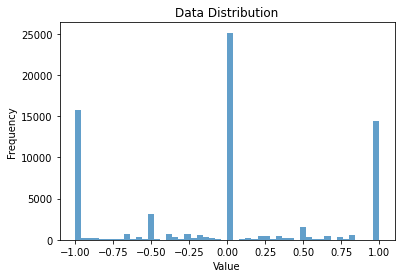

In [2]:
import matplotlib.pyplot as plt

data = merged_all_matched_transcript['label']

plt.hist(data, bins=50, alpha=0.7)
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
for i in range(len(contribution)):
    if contribution.loc[i,'party'].isin(['DEMOCRATIC','GREEN','LIBERTARIAN']):
        contribution.loc[i,'direction'] = -1
    elif contribution.loc[i,'party'].isin(['REPUBLICAN','CONSTITUTION','AMERICAN HERITAGE'，'INDEPENDENT'])
        contribution.loc[i,'direction'] = 1
    else:
        contribution.loc[i,'direction'] = 0

In [ ]:
for i in range(len(contribution)):
    if contribution.loc[i,'party'] == 'DEMOCRATIC':
        contribution.loc[i,'direction'] = -1
    if contribution.loc[i,'party'] == 'REPUBLICAN':
        contribution.loc[i,'direction'] = 1

In [ ]:
contribution = contribution.loc[contribution['party'].isin(['DEMOCRATIC','REPUBLICAN'])]

In [ ]:
contribution1

In [99]:
print(contribution.loc[contribution['contributor_name']=='thomas bill']['party'])

55005     NON PARTISAN
489881             NaN
490108             NaN
879669    NON PARTISAN
Name: party, dtype: object


In [ ]:
matched_transcript_2023 =pd.merge(df1,matched_name,how = 'left',left_on = 'transcriptpersonname', right_on = 'original_name')
# matched_transcript_2023 = pd.merge(combined, df_companies_b, how='left', left_index=True, right_index=True)
matched_transcript_2023 = pd.merge(matched_transcript_2023,c1,how = 'left',left_on = 'match_name', right_on = 'name')

In [77]:
contribution1['contributor_name']

0             small contributions
1                   fayette lorri
2                    hill michael
3                    button nancy
4                      reimer ron
                   ...           
628445               zuvich farms
628446            andrews melinda
628447               zuvich farms
628448               zuvich farms
628449    zylstra tire center inc
Name: contributor_name, Length: 628450, dtype: object

In [29]:
matched_name = matches.loc[matches['score']>=85]

In [30]:
matched_name

,original_name,match_name,score,match_index
378,thomas bill,thomas bell,90.909091,23230
460,xia zhengui,xia zheng,87.878788,13593
600,roberts thomas,robert thomas,86.904762,26550
907,amanda breck,amanda brock,91.666667,23168
1045,rose lee,rose lee,100.000000,27557
...,...,...,...,...
409253,martin kelly j,martin kelly,85.714286,32938
409615,wang lai,wang lai,100.000000,7140
411453,andre peter,andrew peters,85.576923,20079
412323,cline scott,calin scott,90.909091,815


In [23]:
matcher.load_and_process_master_data(column='transcriptpersonname',
                                     df_matching_data=df1, 
                                     transform=True)

In [80]:
df1.loc[df1['transcriptpersonname'] == 'thomas bell']

,Unnamed: 0,companyid,keydevid,transcriptid,headline,mostimportantdateutc,mostimportanttimeutc,keydeveventtypeid,keydeveventtypename,companyname,...,transcriptpersonname,pro_id,companyofperson,speakertypeid,speakertypename,componenttextpreview,word_count,preprocessed_componenttext,assigned_theme,max_similarity_score
645437,645437,110741.0,1.846088e+09,2864155.0,"Leidos Holdings, Inc., Q2 2023 Earnings Call, ...",2023-08-01,12:00:00,48.0,Earnings Calls,"Leidos Holdings, Inc.",...,thomas bell,1.837287e+09,NaN,2,Executives,"Thank you, Stuart, and good morning, everyone....",1713.0,thank stuart good morning everyone 'm pleased ...,IT,0.626376
645441,645441,110741.0,1.846088e+09,2864155.0,"Leidos Holdings, Inc., Q2 2023 Earnings Call, ...",2023-08-01,12:00:00,48.0,Earnings Calls,"Leidos Holdings, Inc.",...,thomas bell,1.837287e+09,NaN,2,Executives,"Sure, Bert. Well, my first trip as CEO was to ...",235.0,sure bert well first trip ceo huntsville visit...,academic,0.613029
645452,645452,110741.0,1.846088e+09,2864155.0,"Leidos Holdings, Inc., Q2 2023 Earnings Call, ...",2023-08-01,12:00:00,48.0,Earnings Calls,"Leidos Holdings, Inc.",...,thomas bell,1.837287e+09,NaN,2,Executives,"I think there is -- thanks for the question, S...",254.0,think -- thanks question sheila think slight r...,federal,0.607607
645458,645458,110741.0,1.846088e+09,2864155.0,"Leidos Holdings, Inc., Q2 2023 Earnings Call, ...",2023-08-01,12:00:00,48.0,Earnings Calls,"Leidos Holdings, Inc.",...,thomas bell,1.837287e+09,NaN,2,Executives,"Yes, you're right. There is a curious dynamic ...",172.0,yes 're right curious dynamic 's set result de...,federal,0.633122
785132,785132,110741.0,1.853963e+09,2903662.0,"Leidos Holdings, Inc. Presents at Jefferies 20...",2023-09-06,19:30:00,51.0,Company Conference Presentations,"Leidos Holdings, Inc.",...,thomas bell,1.837287e+09,NaN,2,Executives,"Thanks, and thanks for hosting the conference....",150.0,thanks thanks hosting conference yes leidos am...,industry,0.646752
785135,785135,110741.0,1.853963e+09,2903662.0,"Leidos Holdings, Inc. Presents at Jefferies 20...",2023-09-06,19:30:00,51.0,Company Conference Presentations,"Leidos Holdings, Inc.",...,thomas bell,1.837287e+09,NaN,2,Executives,One of the things that we're doing is fundamen...,182.0,one things 're fundamental reset full growth p...,economy,0.629202
785142,785142,110741.0,1.853963e+09,2903662.0,"Leidos Holdings, Inc. Presents at Jefferies 20...",2023-09-06,19:30:00,51.0,Company Conference Presentations,"Leidos Holdings, Inc.",...,thomas bell,1.837287e+09,NaN,2,Executives,"Well, the first thing I'll say, and I'll turn ...",120.0,well first thing 'll say 'll turn chris make c...,IT,0.607573
785150,785150,110741.0,1.853963e+09,2903662.0,"Leidos Holdings, Inc. Presents at Jefferies 20...",2023-09-06,19:30:00,51.0,Company Conference Presentations,"Leidos Holdings, Inc.",...,thomas bell,1.837287e+09,NaN,2,Executives,"Well, priority 1 is to complete the balance sh...",90.0,well priority 1 complete balance sheet cleanup...,federal,0.605483


In [27]:
contribution1 = pd.read_csv('contribution.csv')

/tmp/ipykernel_3308/2621032165.py:1: DtypeWarning: Columns (11,13,14,23,31) have mixed types. Specify dtype option on import or set low_memory=False.
  contribution1 = pd.read_csv('contribution.csv')


In [32]:
contribution1

,Unnamed: 0,index,id,report_number,origin,committee_id,filer_id,type,filer_name,office,...,contributor_state,contributor_zip,contributor_occupation,contributor_employer_name,contributor_employer_city,contributor_employer_state,url,contributor_location,direction,contribution
0,0,0,17210326,110143608,C3,21121,WHATRP 227,Political Committee,WHATCOM COUNTY REPUBLICAN PARTY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://apollo.pdc.wa.gov/public/registrations...,NaN,1.0,340.0
1,1,1,17210321,110143608,C3,21121,WHATRP 227,Political Committee,WHATCOM COUNTY REPUBLICAN PARTY,NaN,...,WA,98226,MAINTENANCE WORKER,Matrix Service Refinery,Ferndale,WA,https://apollo.pdc.wa.gov/public/registrations...,NaN,1.0,255.0
2,2,2,17210320,110143608,C3,21121,WHATRP 227,Political Committee,WHATCOM COUNTY REPUBLICAN PARTY,NaN,...,WA,98230,NaN,NaN,NaN,NaN,https://apollo.pdc.wa.gov/public/registrations...,NaN,1.0,170.0
3,3,3,17210319,110143608,C3,21121,WHATRP 227,Political Committee,WHATCOM COUNTY REPUBLICAN PARTY,NaN,...,WA,98226,NaN,NaN,NaN,NaN,https://apollo.pdc.wa.gov/public/registrations...,NaN,1.0,170.0
4,4,4,17210318,110143608,C3,21121,WHATRP 227,Political Committee,WHATCOM COUNTY REPUBLICAN PARTY,NaN,...,WA,98248,SELF EMPLOYED,"R & R Excavating, Inc.",FERNDALE,WA,https://apollo.pdc.wa.gov/public/registrations...,POINT (-122.54258 48.87995),1.0,340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628445,628445,1047981,12569888,100262875,C3,4573,DAUGD 528,Candidate,DAUGS DARYL D,STATE REPRESENTATIVE,...,WA,98557,NaN,NaN,NaN,NaN,https://web.pdc.wa.gov/rptimg/default.aspx?rep...,NaN,-1.0,-50.0
628446,628446,1048131,13394608,100263180,C3,18568,SPRIL 033,Candidate,Larry Springer,STATE REPRESENTATIVE,...,WA,98005,RETIRED,RETIRED,NaN,NaN,https://web.pdc.wa.gov/rptimg/default.aspx?rep...,NaN,-1.0,-250.0
628447,628447,1048216,12569661,100254702,C3,4573,DAUGD 528,Candidate,DAUGS DARYL D,STATE REPRESENTATIVE,...,WA,98557,NaN,NaN,NaN,NaN,https://web.pdc.wa.gov/rptimg/default.aspx?rep...,NaN,-1.0,-100.0
628448,628448,1048447,12569740,100252894,C3,4573,DAUGD 528,Candidate,DAUGS DARYL D,STATE REPRESENTATIVE,...,WA,98557,NaN,NaN,NaN,NaN,https://web.pdc.wa.gov/rptimg/default.aspx?rep...,NaN,-1.0,-50.0


In [34]:
contribution1[['contributor_name','direction','contribution']]

,contributor_name,direction,contribution
0,small contributions,1.0,340.0
1,fayette lorri,1.0,255.0
2,hill michael,1.0,170.0
3,button nancy,1.0,170.0
4,reimer ron,1.0,340.0
...,...,...,...
628445,zuvich farms,-1.0,-50.0
628446,andrews melinda,-1.0,-250.0
628447,zuvich farms,-1.0,-100.0
628448,zuvich farms,-1.0,-50.0


In [55]:
c1 = contribution1[['contributor_name','direction','contribution']].groupby('contributor_name').sum()


In [56]:
c1['name'] = c1.index

In [57]:
c1

,direction,contribution,name
contributor_name,,,
1 store inc,1.0,50.0,1 store inc
1008 building llc,-1.0,-100.0,1008 building llc
10th dist demo,-7.0,-18300.0,10th dist demo
10th district democrats,-3.0,-4500.0,10th district democrats
10th ld democrats,-1.0,-1000.0,10th ld democrats
...,...,...,...
zyskowski martin,-1.0,-50.0,zyskowski martin
zyskowski norman eugene,-2.0,-100.0,zyskowski norman eugene
zytnicki gerard,-1.0,-200.0,zytnicki gerard


In [66]:
matcher.load_and_process_master_data(column='name',
                                     df_matching_data=c1, 
                                     transform=True)

In [26]:
df1['transcriptpersonname'] = df1['transcriptpersonname'].apply(lambda x: x.replace('\t', '').replace('\n', '').strip())
df1['transcriptpersonname']

0            atanu kumar das
1            atanu kumar das
5          unknown executive
10         unknown executive
11           atanu kumar das
                 ...        
816266    rajeev nannapaneni
816268    rajeev nannapaneni
816273       rajesh chebiyam
816276             max wygod
816277         michael vesey
Name: transcriptpersonname, Length: 374739, dtype: object

In [58]:
c1['name'] = c1['name'].apply(lambda x: x.replace('\t', '').replace('\n', '').strip())
c1['name']

contributor_name
1 store inc                            1 store inc
1008 building llc                1008 building llc
10th dist demo                      10th dist demo
10th district democrats    10th district democrats
10th ld democrats                10th ld democrats
                                    ...           
zyskowski martin                  zyskowski martin
zyskowski norman eugene    zyskowski norman eugene
zytnicki gerard                    zytnicki gerard
zyvoloski dennis l              zyvoloski dennis l
zywiciel robert                    zywiciel robert
Name: name, Length: 226994, dtype: object

In [68]:
c1.loc[c1['name'] == 'thomas bell']

,direction,contribution,name
contributor_name,,,


In [63]:
cm = pd.merge(c1,matched_name ,how = 'right', left_on = 'name', right_on = 'original_name')
cm

,direction,contribution,name,original_name,match_name,score,match_index
0,NaN,NaN,NaN,thomas bill,thomas bell,90.909091,23230
1,NaN,NaN,NaN,xia zhengui,xia zheng,87.878788,13593
2,-1.0,-150.0,roberts thomas,roberts thomas,robert thomas,86.904762,26550
3,NaN,NaN,NaN,amanda breck,amanda brock,91.666667,23168
4,NaN,NaN,NaN,rose lee,rose lee,100.000000,27557
...,...,...,...,...,...,...,...
798,-1.0,-50.0,martin kelly j,martin kelly j,martin kelly,85.714286,32938
799,-2.0,-200.0,wang lai,wang lai,wang lai,100.000000,7140
800,1.0,50.0,andre peter,andre peter,andrew peters,85.576923,20079
801,NaN,NaN,NaN,cline scott,calin scott,90.909091,815


In [59]:
matched_transcript_2023 =pd.merge(df1,matched_name,how = 'left',left_on = 'transcriptpersonname', right_on = 'original_name')
# matched_transcript_2023 = pd.merge(combined, df_companies_b, how='left', left_index=True, right_index=True)
matched_transcript_2023 = pd.merge(matched_transcript_2023,c1,how = 'left',left_on = 'match_name', right_on = 'name')

In [60]:
matched_transcript_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374771 entries, 0 to 374770
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      374771 non-null  int64  
 1   companyid                       374771 non-null  float64
 2   keydevid                        374771 non-null  float64
 3   transcriptid                    374771 non-null  float64
 4   headline                        374771 non-null  object 
 5   mostimportantdateutc            374771 non-null  object 
 6   mostimportanttimeutc            374771 non-null  object 
 7   keydeveventtypeid               374771 non-null  float64
 8   keydeveventtypename             374771 non-null  object 
 9   companyname                     374771 non-null  object 
 10  transcriptcollectiontypeid      374771 non-null  float64
 11  transcriptcollectiontypename    374771 non-null  object 
 12  transcriptpresen

In [ ]:
matcher.load_and_process_master_data('company_name', test_names, transform=True)

In [1]:
import pandas as pd
df1= pd.read_csv('./autodl-tmp/2023.csv')
df2= pd.read_csv('./autodl-tmp/2022.csv')
df3= pd.read_csv('./autodl-tmp/2021.csv')
df4= pd.read_csv('./autodl-tmp/2020.csv')
df5= pd.read_csv('./autodl-tmp/2019.csv')

FileNotFoundError: [Errno 2] No such file or directory: './autodl-tmp/2019csv'

In [5]:
df1 = df1.loc[df1['speakertypename'] == 'Executives']
df2 = df2.loc[df2['speakertypename'] == 'Executives']
df3 = df3.loc[df3['speakertypename'] == 'Executives']
df4 = df4.loc[df4['speakertypename'] == 'Executives']
df5 = df5.loc[df5['speakertypename'] == 'Executives']

In [6]:
import numpy as np
df1 = df1.loc[df1['max_similarity_score'] > np.mean(df1['max_similarity_score'].to_list())]
df2 = df2.loc[df2['max_similarity_score'] > np.mean(df2['max_similarity_score'].to_list())]
df3 = df3.loc[df3['max_similarity_score'] > np.mean(df3['max_similarity_score'].to_list())]
df4 = df4.loc[df4['max_similarity_score'] > np.mean(df4['max_similarity_score'].to_list())]
df5 = df5.loc[df5['max_similarity_score'] > np.mean(df5['max_similarity_score'].to_list())]

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375445 entries, 0 to 816277
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   companyid                       375445 non-null  float64
 1   keydevid                        375445 non-null  float64
 2   transcriptid                    375445 non-null  float64
 3   headline                        375445 non-null  object 
 4   mostimportantdateutc            375445 non-null  object 
 5   mostimportanttimeutc            375445 non-null  object 
 6   keydeveventtypeid               375445 non-null  float64
 7   keydeveventtypename             375445 non-null  object 
 8   companyname                     375445 non-null  object 
 9   transcriptcollectiontypeid      375445 non-null  float64
 10  transcriptcollectiontypename    375445 non-null  object 
 11  transcriptpresentationtypeid    375445 non-null  float64
 12  transcriptpresentatio

In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 585754 entries, 1 to 1250898
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   companyid                       585754 non-null  float64
 1   keydevid                        585754 non-null  float64
 2   transcriptid                    585754 non-null  float64
 3   headline                        585754 non-null  object 
 4   mostimportantdateutc            585754 non-null  object 
 5   mostimportanttimeutc            585754 non-null  object 
 6   keydeveventtypeid               585754 non-null  float64
 7   keydeveventtypename             585754 non-null  object 
 8   companyname                     585733 non-null  object 
 9   transcriptcollectiontypeid      585754 non-null  float64
 10  transcriptcollectiontypename    585754 non-null  object 
 11  transcriptpresentationtypeid    585754 non-null  float64
 12  transcriptpresentati

In [24]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050247 entries, 0 to 2227486
Data columns (total 35 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   companyid                       1050247 non-null  float64
 1   keydevid                        1050247 non-null  float64
 2   transcriptid                    1050247 non-null  float64
 3   headline                        1050247 non-null  object 
 4   mostimportantdateutc            1050247 non-null  object 
 5   mostimportanttimeutc            1050247 non-null  float64
 6   keydeveventtypeid               1050247 non-null  float64
 7   keydeveventtypename             1050247 non-null  object 
 8   companyname                     0 non-null        float64
 9   transcriptcollectiontypeid      1050247 non-null  float64
 10  transcriptcollectiontypename    1050247 non-null  object 
 11  transcriptpresentationtypeid    1050247 non-null  float64
 12  trans

In [26]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 509164 entries, 0 to 1104783
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   companyid                       509164 non-null  float64
 1   keydevid                        509164 non-null  float64
 2   transcriptid                    509164 non-null  float64
 3   headline                        509164 non-null  object 
 4   mostimportantdateutc            509164 non-null  object 
 5   mostimportanttimeutc            509164 non-null  float64
 6   keydeveventtypeid               509164 non-null  float64
 7   keydeveventtypename             509164 non-null  object 
 8   companyname                     0 non-null       float64
 9   transcriptcollectiontypeid      509164 non-null  float64
 10  transcriptcollectiontypename    509164 non-null  object 
 11  transcriptpresentationtypeid    509164 non-null  float64
 12  transcriptpresentati

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593188 entries, 0 to 1259125
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   companyid                       593188 non-null  float64
 1   keydevid                        593188 non-null  float64
 2   transcriptid                    593188 non-null  float64
 3   headline                        593188 non-null  object 
 4   mostimportantdateutc            593188 non-null  object 
 5   mostimportanttimeutc            593188 non-null  object 
 6   keydeveventtypeid               593188 non-null  float64
 7   keydeveventtypename             593188 non-null  object 
 8   companyname                     593123 non-null  object 
 9   transcriptcollectiontypeid      593188 non-null  float64
 10  transcriptcollectiontypename    593188 non-null  object 
 11  transcriptpresentationtypeid    593188 non-null  float64
 12  transcriptpresentati

In [15]:
df1 = df1.drop('Unnamed: 0',axis = 1)

In [17]:
df2 = df2.drop(['Unnamed: 0','Unnamed: 0.1'],axis = 1)

In [19]:
df3 = df3.drop(['Unnamed: 0','Unnamed: 0.1'],axis = 1)

In [22]:
df4 = df4.drop(['Unnamed: 0','transcriptid.1'],axis = 1)

In [25]:
df5 = df5.drop(['Unnamed: 0','Unnamed: 0.1','transcriptid.1','max_similarity'],axis = 1)

In [33]:
all_transcript = pd.concat([df1, df2, df3, df4, df5], axis=0)
all_transcript.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3113798 entries, 0 to 1104783
Data columns (total 37 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   companyid                       float64
 1   keydevid                        float64
 2   transcriptid                    float64
 3   headline                        object 
 4   mostimportantdateutc            object 
 5   mostimportanttimeutc            object 
 6   keydeveventtypeid               float64
 7   keydeveventtypename             object 
 8   companyname                     object 
 9   transcriptcollectiontypeid      float64
 10  transcriptcollectiontypename    object 
 11  transcriptpresentationtypeid    float64
 12  transcriptpresentationtypename  object 
 13  transcriptcreationdate_utc      object 
 14  transcriptcreationtime_utc      object 
 15  audiolengthsec                  float64
 16  isdelayed_flag                  float64
 17  delayreasontypeid               

In [34]:
all_transcript['transcriptcomponentid'] = all_transcript['transcriptcomponentid'].fillna(all_transcript['transcriptcomponentid '])

In [38]:
all_transcript = all_transcript.drop('transcriptcomponentid ', axis = 1)

In [39]:
all_transcript['pro_id'] = all_transcript['pro_id'].fillna(all_transcript['proid'])

In [40]:
all_transcript = all_transcript.drop('proid', axis = 1)

In [41]:
all_transcript.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3113798 entries, 0 to 1104783
Data columns (total 35 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   companyid                       float64
 1   keydevid                        float64
 2   transcriptid                    float64
 3   headline                        object 
 4   mostimportantdateutc            object 
 5   mostimportanttimeutc            object 
 6   keydeveventtypeid               float64
 7   keydeveventtypename             object 
 8   companyname                     object 
 9   transcriptcollectiontypeid      float64
 10  transcriptcollectiontypename    object 
 11  transcriptpresentationtypeid    float64
 12  transcriptpresentationtypename  object 
 13  transcriptcreationdate_utc      object 
 14  transcriptcreationtime_utc      object 
 15  audiolengthsec                  float64
 16  isdelayed_flag                  float64
 17  delayreasontypeid               

In [44]:
all_transcript.to_csv('Transcript 2019-2023.csv', index=False)

In [45]:
df = pd.read_csv('all_matched_transcript.csv')

/tmp/ipykernel_823/74771054.py:1: DtypeWarning: Columns (6,9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('all_matched_transcript.csv')


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69607 entries, 0 to 69606
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   companyid                       69607 non-null  float64
 1   keydevid                        69607 non-null  float64
 2   transcriptid                    69607 non-null  float64
 3   headline                        69607 non-null  object 
 4   mostimportantdateutc            69607 non-null  object 
 5   mostimportanttimeutc            69607 non-null  object 
 6   keydeveventtypeid               69607 non-null  float64
 7   keydeveventtypename             69607 non-null  object 
 8   companyname                     34355 non-null  object 
 9   transcriptcollectiontypeid      69607 non-null  float64
 10  transcriptcollectiontypename    69607 non-null  object 
 11  transcriptpresentationtypeid    69607 non-null  float64
 12  transcriptpresentationtypename  

In [47]:
df['transcriptcomponentid'] = df['transcriptcomponentid'].fillna(df['transcriptcomponentid '])

In [48]:
df = df.drop(['transcriptcomponentid ', 'Unnamed: 0'], axis = 1)

In [54]:
label_list = df[['transcriptpersonname','label']].groupby('transcriptpersonname').mean()

In [59]:
df_final = pd.merge(df,label_list,left_on = 'transcriptpersonname', right_index = True )

In [62]:
df_final['label'] = df_final['label_y']
df_final = df_final.drop(['label_x','label_y'], axis =1)

In [65]:
df_final.groupby('label').count()

,companyid,keydevid,transcriptid,headline,mostimportantdateutc,mostimportanttimeutc,keydeveventtypeid,keydeveventtypename,companyname,transcriptcollectiontypeid,...,speakertypeid,speakertypename,componenttextpreview,word_count,componenttext,preprocessed_componenttext,assigned_theme,max_similarity_score,whether_executive,whether_company
label,,,,,,,,,,,,,,,,,,,,,
-1,40763,40763,40763,40763,40763,40763,40763,40763,20008,40763,...,40763,40763,40763,40763,40763,40763,40763,40763,40763,40763
1,28844,28844,28844,28844,28844,28844,28844,28844,14347,28844,...,28844,28844,28844,28844,28844,28844,28844,28844,28844,28844


In [64]:
df_final

,companyid,keydevid,transcriptid,headline,mostimportantdateutc,mostimportanttimeutc,keydeveventtypeid,keydeveventtypename,companyname,transcriptcollectiontypeid,...,speakertypename,componenttextpreview,word_count,componenttext,preprocessed_componenttext,assigned_theme,max_similarity_score,whether_executive,whether_company,label
0,314148703.0,5.970347e+08,1630856.0,"Codiak Biosciences, Inc., Jazz Pharmaceuticals...",2019-01-04,48600.0,194.0,Special Calls,NaN,2.0,...,Executives,"Thank you, Bruce, and thanks to the entire tea...",1319.0,"Thank you, Bruce, and thanks to the entire tea...",thank bruce thanks entire team jazz good morni...,industry,0.650752,0,0,1
1,314148703.0,5.970347e+08,1630856.0,"Codiak Biosciences, Inc., Jazz Pharmaceuticals...",2019-01-04,48600.0,194.0,Special Calls,NaN,2.0,...,Executives,"Thank you, Bruce, and thanks to the entire tea...",1319.0,"Thank you, Bruce, and thanks to the entire tea...",thank bruce thanks entire team jazz good morni...,industry,0.650752,0,0,1
2,314148703.0,5.970347e+08,1630856.0,"Codiak Biosciences, Inc., Jazz Pharmaceuticals...",2019-01-04,48600.0,194.0,Special Calls,NaN,2.0,...,Executives,"Sure, be happy to. So I think you're correct, ...",215.0,"Sure, be happy to. So I think you're correct, ...",sure happy think 're correct number companies ...,industry,0.607082,0,0,1
3,314148703.0,5.970347e+08,1630856.0,"Codiak Biosciences, Inc., Jazz Pharmaceuticals...",2019-01-04,48600.0,194.0,Special Calls,NaN,2.0,...,Executives,"Sure, be happy to. So I think you're correct, ...",215.0,"Sure, be happy to. So I think you're correct, ...",sure happy think 're correct number companies ...,industry,0.607082,0,0,1
4,314148703.0,5.970347e+08,1630856.0,"Codiak Biosciences, Inc., Jazz Pharmaceuticals...",2019-01-04,48600.0,194.0,Special Calls,NaN,2.0,...,Executives,I think we feel very comfortable based on the ...,163.0,I think we feel very comfortable based on the ...,think feel comfortable based preclinical data ...,health,0.642475,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69216,21127.0,1.853411e+09,2902113.0,Intel Corporation Presents at Goldman Sachs Co...,2023-09-05,18:30:00,51.0,Company Conference Presentations,intel corporation,2.0,...,Executives,I mean there are some rather Grovian conversat...,346.0,I mean there are some rather Grovian conversat...,mean rather grovian conversations 're andy fam...,business,0.634829,0,1,-1
69360,874613.0,1.848613e+09,2904807.0,The Foschini Group Limited - Shareholder/Analy...,2023-09-07,12:15:00,50.0,Shareholder/Analyst Calls,the foschini group limited,2.0,...,Executives,Yes. Let me address them individually. So in r...,253.0,Yes. Let me address them individually. So in r...,yes let address individually regard first ques...,federal,0.635063,0,1,-1
69414,880251.0,1.844767e+09,2905381.0,ATS Corporation - Analyst/Investor Day,2023-09-06,12:30:00,192.0,Analyst/Investor Day,ats corporation,2.0,...,Executives,"Good morning, ladies and gentlemen. I'm Christ...",3279.0,"Good morning, ladies and gentlemen. I'm Christ...",good morning ladies gentlemen 'm christian deb...,IT,0.675330,0,1,1
69421,880251.0,1.844767e+09,2905381.0,ATS Corporation - Analyst/Investor Day,2023-09-06,12:30:00,192.0,Analyst/Investor Day,ats corporation,2.0,...,Executives,"That's like I said in my presentation, so we a...",76.0,"That's like I said in my presentation, so we a...",'s like said presentation able connect differe...,industry,0.609938,0,1,1


In [55]:
def transform_label(value):
    if value > 0:
        return 1
    elif value < 0:
        return -1
    else:
        return np.random.choice([-1, 1])

# 应用函数到 'label' 列
label_list['label'] = label_list['label'].apply(transform_label)

In [66]:
df_final.to_csv('all_matched_transcript.csv',index = False)

In [9]:
import pandas as pd
df1 = pd.read_csv('2019_matched_name.csv')[['transcriptpersonname','contributor_name']]
df2 = pd.read_csv('2020_matched_name.csv')[['transcriptpersonname','contributor_name']]
df3 = pd.read_csv('2021_matched_name.csv')[['transcriptpersonname','contributor_name']]
df4 = pd.read_csv('2022_matched_name.csv')[['transcriptpersonname','contributor_name']]
df5 = pd.read_csv('2023_matched_name.csv')[['transcriptpersonname','contributor_name']]

In [11]:
all_name = pd.concat([df1, df2, df3, df4, df5], axis=0)
all_name.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4068 entries, 0 to 802
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   transcriptpersonname  4068 non-null   object
 1   contributor_name      4068 non-null   object
dtypes: object(2)
memory usage: 95.3+ KB


In [15]:
all_name = all_name.drop_duplicates()

In [16]:
all_name.to_csv('Matched Name.csv')

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   transcriptpersonname  712 non-null    object
 1   contributor_name      712 non-null    object
dtypes: object(2)
memory usage: 11.2+ KB


In [7]:
df1.head()

,Unnamed: 0,transcriptpersonname,original_name,match_name,score,match_index,contributor_name
0,402.0,martin kelly,martin kelly j,martin kelly,85.714286,27592,martin kelly j
1,623.0,graham drake,graham dirk,graham drake,86.111111,4846,graham dirk
2,1038.0,howard marks,howard mark,howard marks,94.444444,20879,howard mark
3,1178.0,thomas james,thomas james m,thomas james,85.714286,26400,thomas james m
4,2163.0,stanton jones,stanton james,stanton jones,88.461538,4207,stanton james
